In [2]:
# import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

2023-10-19 14:50:44.214328: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-19 14:50:44.254587: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-19 14:50:44.254606: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-19 14:50:44.254615: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-19 14:50:44.266021: I tensorflow/core/platform/cpu_feature_g

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7118549099953887619
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5607784448
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17888739178496577746
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


2023-10-19 14:50:45.528435: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 14:50:45.548796: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 14:50:45.548816: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 14:50:46.270208: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 14:50:46.270237: I tensorflow/compile

In [3]:
os.chdir("/mnt/")

NameError: name 'os' is not defined

In [4]:
!git clone https://github.com/Annaantonin/Data.git

fatal: destination path 'Data' already exists and is not an empty directory.


In [5]:
import Data as data

In [6]:
!git clone https://github.com/Crunch-UQ4MI/neuraluq.git
#!git clone https://github.com/Annaantonin/Data.git
!pip install tensorflow-probability
!pip install scipy
import os
os.chdir("/tf/neuraluq/")
!python setup.py install

fatal: destination path 'neuraluq' already exists and is not an empty directory.

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3 -m pip install --upgrade pip
/usr/local/lib/python3.11/dist-packages/setuptools/dist.py:314: InformationOnly: Normalizing 'v0.1.0-beta' to '0.1.0b0'
  self.metadata.version = self._normalize_version(
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************

In [7]:
os.listdir(".")

['dataset',
 'README.md',
 'dist',
 'build',
 'output.mat',
 'examples',
 'NeuralUQ.egg-info',
 '.git',
 'setup.py',
 'Data',
 'neuraluq']

In [7]:
import neuraluq as neuq
import neuraluq.variables as neuq_vars
from neuraluq.config import tf

import numpy as np
import scipy.io as sio
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  4 16:14:30 2023

@author: Antonina
"""

#%%
# Simulated SDOF with:
# % SDOF System Parameters
# m = 5.0;       % Mass (kg)
# k = 10.0;     % Stiffness (N/m)
# c = 0.22;      % Damping coefficient (Ns/m)
# dt=0.001

def load_data(noise_x, noise_f):

    #data = sio.loadmat(r"G:\My Drive\Python_codes\NNs\sdof_ymeas.mat")
    data = sio.loadmat("Data/sdof_ymeas.mat")
    #  t_x_train, t_f_train = data["t"], data["ymeas"]
    # data = matdata['data']
    
    x_tt_train, t_train = data["a"], data["t"]
    x_train, f_train = data["u"], data["force"]
    # train_x_tt = t_x_tt_train, x_train
    # train_f = t_f_train, f_train

    return  x_tt_train.T, t_train.T, x_train.T, f_train.T

#m=1
# [0][..., 0:1]     

def pde_fn(t, x, f, log_c, log_k):
    # log_k=tf.clip(np.log(3),np.log(20)) # to make constrains for the parameters
    x_t = tf.gradients(x, t)                                                                                                                                                                                                                            
    # x_tt = tf.gradients(x_t, t)

    # x_tt=f - tf.multiply(x_tt, 5.0)+ tf.exp(log_c) * x_t + tf.exp(log_k) * x
    x_tt=(f - (tf.exp(log_c) * x_t + tf.exp(log_k) * x))
    # return [f,x_tt]
    return tf.multiply(x_tt, 0.20)

def pde_xtt(t,x):
    x_t = tf.gradients(x, t)                                                                                                                                                                                                                        
    x_tt = tf.gradients(x_t, t)
    
    return x_tt
    

@neuq.utils.timer
def Trainable(
    x_tt_train, t_train, x_train, f_train, noise, layers, 
):
    # build processes
    process_f = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        # surrogate=neuq.surrogates.FNN(layers=layers,activation=RELu),
        posterior=neuq_vars.fnn.Trainable(layers=layers),# predicted force
    )  
    process_x = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers),
        # surrogate=neuq.surrogates.FNN(layers=layers,activation=RELu),
        posterior=neuq_vars.fnn.Trainable(layers=layers),# predicted displacement
    )
    process_log_c = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=-1),
    )
    process_log_k = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=2),
    )
    method = neuq.inferences.DEns(
        num_samples=10, num_iterations=20000, optimizer=tf.train.AdamOptimizer(1e-3),
    )

    # build losses
    loss_x = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x_tt_train, # could be the problem
        processes=[process_x],
        pde=pde_xtt, # dotdot _X
        multiplier=1.0,
    )
    
    loss_f = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x_tt_train, # f_train  CHANGE!!!!
        processes=[process_x,process_f, process_log_c, process_log_k], # tf train
        pde=pde_fn,
        multiplier=1.0,
    )
    # build model
    model = neuq.models.Model(
        processes=[process_x, process_f, process_log_c, process_log_k],
        likelihoods=[loss_x, loss_f],
    )
    # assign and compile method
    model.compile(method)
    # obtain posterior samples
    samples = model.run()

    processes = [process_x, process_f, process_log_c, process_log_k]
    return processes, samples, model


if __name__ == "__main__":

    noise = 0

    x_tt_train, t_train, x_train, f_train = load_data(noise, noise)

    # t_x_tt_train, x_tt_train = train_x_tt
    # t_f_train, f_train = train_f

    layers = [1, 100, 100, 1]

    processes, samples, model = Trainable(
        x_tt_train, t_train, x_train, f_train, noise, layers,
    )

    x_pred, f_pred, logc_pred, logk_pred = model.predict(t_train, samples, processes, pde_fn=None)

   

2023-10-19 14:50:58.696741: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 14:50:58.696799: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 14:50:58.696808: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 14:50:58.696972: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 14:50:58.696982: I tensorflow/compile

Supporting backend tensorflow.compat.v1

Compiling a Ensemble method

Generating 0th sample by deep ensemble...


2023-10-19 14:50:59.264243: W tensorflow/c/c_api.cc:305] Operation '{name:'Variable_13/Assign' id:100 op device:{requested: '', assigned: ''} def:{{{node Variable_13/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](Variable_13, Const_1)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  0 , loss:  2186.1086
Iteration:  1000 , loss:  897.9634
Iteration:  2000 , loss:  410.41827
Iteration:  3000 , loss:  360.73468
Iteration:  4000 , loss:  322.99417
Iteration:  5000 , loss:  302.95087
Iteration:  6000 , loss:  295.4886
Iteration:  7000 , loss:  289.76755
Iteration:  8000 , loss:  284.66257
Iteration:  9000 , loss:  281.10965
Iteration:  10000 , loss:  278.48822
Iteration:  11000 , loss:  276.2828
Iteration:  12000 , loss:  274.67242
Iteration:  13000 , loss:  273.54477
Iteration:  14000 , loss:  272.53094
Iteration:  15000 , loss:  271.69196
Iteration:  16000 , loss:  271.15326
Iteration:  17000 , loss:  270.5061
Iteration:  18000 , loss:  272.6952
Iteration:  19000 , loss:  269.51926
Generating 1th sample by deep ensemble...
Iteration:  0 , loss:  2183.0327


2023-10-19 14:52:07.525419: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power/Assign' id:737 op device:{requested: '', assigned: ''} def:{{{node beta2_power/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power, beta2_power/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  1041.6709
Iteration:  2000 , loss:  506.87973
Iteration:  3000 , loss:  376.61746
Iteration:  4000 , loss:  346.91736
Iteration:  5000 , loss:  324.0596
Iteration:  6000 , loss:  315.54913
Iteration:  7000 , loss:  309.27658
Iteration:  8000 , loss:  304.49384
Iteration:  9000 , loss:  299.36618
Iteration:  10000 , loss:  294.9671
Iteration:  11000 , loss:  291.23865
Iteration:  12000 , loss:  289.5504
Iteration:  13000 , loss:  285.19037
Iteration:  14000 , loss:  282.60297
Iteration:  15000 , loss:  280.44193
Iteration:  16000 , loss:  279.26422
Iteration:  17000 , loss:  276.98398
Iteration:  18000 , loss:  275.71014
Iteration:  19000 , loss:  274.54523
Generating 2th sample by deep ensemble...
Iteration:  0 , loss:  2187.1484


2023-10-19 14:53:15.012793: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power/Assign' id:737 op device:{requested: '', assigned: ''} def:{{{node beta2_power/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power, beta2_power/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  1215.302
Iteration:  2000 , loss:  518.85803
Iteration:  3000 , loss:  398.97864
Iteration:  4000 , loss:  388.3792
Iteration:  5000 , loss:  367.90714
Iteration:  6000 , loss:  331.7106
Iteration:  7000 , loss:  315.42496
Iteration:  8000 , loss:  307.8977
Iteration:  9000 , loss:  302.3868
Iteration:  10000 , loss:  297.67676
Iteration:  11000 , loss:  293.8751
Iteration:  12000 , loss:  290.09277
Iteration:  13000 , loss:  287.00327
Iteration:  14000 , loss:  284.7621
Iteration:  15000 , loss:  282.03772
Iteration:  16000 , loss:  280.06592
Iteration:  17000 , loss:  278.39783
Iteration:  18000 , loss:  276.97537
Iteration:  19000 , loss:  275.78607
Generating 3th sample by deep ensemble...
Iteration:  0 , loss:  2182.561


2023-10-19 14:54:22.634028: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power/Assign' id:737 op device:{requested: '', assigned: ''} def:{{{node beta2_power/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power, beta2_power/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  1259.4086
Iteration:  2000 , loss:  972.10376
Iteration:  3000 , loss:  655.13104
Iteration:  4000 , loss:  615.8053
Iteration:  5000 , loss:  587.2066
Iteration:  6000 , loss:  458.45813
Iteration:  7000 , loss:  427.21216
Iteration:  8000 , loss:  417.32083
Iteration:  9000 , loss:  393.39246
Iteration:  10000 , loss:  134.6773
Iteration:  11000 , loss:  121.75956
Iteration:  12000 , loss:  100.57665
Iteration:  13000 , loss:  67.55708
Iteration:  14000 , loss:  62.340973
Iteration:  15000 , loss:  60.02388
Iteration:  16000 , loss:  58.309303
Iteration:  17000 , loss:  57.02111
Iteration:  18000 , loss:  56.054512
Iteration:  19000 , loss:  54.98536
Generating 4th sample by deep ensemble...
Iteration:  0 , loss:  2183.6118


2023-10-19 14:55:29.622327: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power/Assign' id:737 op device:{requested: '', assigned: ''} def:{{{node beta2_power/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power, beta2_power/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  980.0706
Iteration:  2000 , loss:  489.90338
Iteration:  3000 , loss:  374.5381
Iteration:  4000 , loss:  348.2841
Iteration:  5000 , loss:  295.91235
Iteration:  6000 , loss:  281.26328
Iteration:  7000 , loss:  141.31898
Iteration:  8000 , loss:  127.80262
Iteration:  9000 , loss:  101.061455
Iteration:  10000 , loss:  64.1491
Iteration:  11000 , loss:  60.605103
Iteration:  12000 , loss:  58.540863
Iteration:  13000 , loss:  57.354374
Iteration:  14000 , loss:  56.212585
Iteration:  15000 , loss:  55.297768
Iteration:  16000 , loss:  54.525692
Iteration:  17000 , loss:  54.18514
Iteration:  18000 , loss:  53.24279
Iteration:  19000 , loss:  52.199768
Generating 5th sample by deep ensemble...
Iteration:  0 , loss:  2183.622


2023-10-19 14:56:37.796647: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power/Assign' id:737 op device:{requested: '', assigned: ''} def:{{{node beta2_power/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power, beta2_power/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  1294.9259
Iteration:  2000 , loss:  825.4763
Iteration:  3000 , loss:  662.49677
Iteration:  4000 , loss:  647.5503
Iteration:  5000 , loss:  642.0718
Iteration:  6000 , loss:  637.2611
Iteration:  7000 , loss:  632.7882
Iteration:  8000 , loss:  628.5984
Iteration:  9000 , loss:  624.3587
Iteration:  10000 , loss:  620.31287
Iteration:  11000 , loss:  616.47205
Iteration:  12000 , loss:  612.9569
Iteration:  13000 , loss:  557.7851
Iteration:  14000 , loss:  514.1238
Iteration:  15000 , loss:  468.7998
Iteration:  16000 , loss:  412.98608
Iteration:  17000 , loss:  385.64493
Iteration:  18000 , loss:  366.97308
Iteration:  19000 , loss:  353.92194
Generating 6th sample by deep ensemble...
Iteration:  0 , loss:  2182.9497


2023-10-19 14:57:45.613944: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power/Assign' id:737 op device:{requested: '', assigned: ''} def:{{{node beta2_power/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power, beta2_power/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  589.7128
Iteration:  2000 , loss:  79.3905
Iteration:  3000 , loss:  50.386612
Iteration:  4000 , loss:  49.853516
Iteration:  5000 , loss:  46.413246
Iteration:  6000 , loss:  44.28687
Iteration:  7000 , loss:  42.76122
Iteration:  8000 , loss:  40.825073
Iteration:  9000 , loss:  38.824898
Iteration:  10000 , loss:  37.261185
Iteration:  11000 , loss:  36.33454
Iteration:  12000 , loss:  34.536175
Iteration:  13000 , loss:  33.395535
Iteration:  14000 , loss:  32.038555
Iteration:  15000 , loss:  30.938044
Iteration:  16000 , loss:  30.043455
Iteration:  17000 , loss:  28.926252
Iteration:  18000 , loss:  28.013107
Iteration:  19000 , loss:  27.14257
Generating 7th sample by deep ensemble...
Iteration:  0 , loss:  2184.2524


2023-10-19 14:58:52.518043: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power/Assign' id:737 op device:{requested: '', assigned: ''} def:{{{node beta2_power/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power, beta2_power/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  1047.1497
Iteration:  2000 , loss:  709.0331
Iteration:  3000 , loss:  669.03284
Iteration:  4000 , loss:  493.19238
Iteration:  5000 , loss:  382.8582
Iteration:  6000 , loss:  355.11353
Iteration:  7000 , loss:  335.83234
Iteration:  8000 , loss:  327.3227
Iteration:  9000 , loss:  322.41473
Iteration:  10000 , loss:  319.01807
Iteration:  11000 , loss:  283.44067
Iteration:  12000 , loss:  267.19882
Iteration:  13000 , loss:  260.53598
Iteration:  14000 , loss:  262.92358
Iteration:  15000 , loss:  254.37537
Iteration:  16000 , loss:  251.71585
Iteration:  17000 , loss:  249.78162
Iteration:  18000 , loss:  248.15854
Iteration:  19000 , loss:  249.56848
Generating 8th sample by deep ensemble...
Iteration:  0 , loss:  2186.685


2023-10-19 15:00:01.158381: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power/Assign' id:737 op device:{requested: '', assigned: ''} def:{{{node beta2_power/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power, beta2_power/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  863.83044
Iteration:  2000 , loss:  345.7318
Iteration:  3000 , loss:  309.1298
Iteration:  4000 , loss:  307.77554
Iteration:  5000 , loss:  306.25424
Iteration:  6000 , loss:  135.8512
Iteration:  7000 , loss:  125.87619
Iteration:  8000 , loss:  121.95796
Iteration:  9000 , loss:  119.05918
Iteration:  10000 , loss:  117.14626
Iteration:  11000 , loss:  115.62079
Iteration:  12000 , loss:  114.32271
Iteration:  13000 , loss:  109.78379
Iteration:  14000 , loss:  68.16253
Iteration:  15000 , loss:  63.27609
Iteration:  16000 , loss:  58.911972
Iteration:  17000 , loss:  55.710884
Iteration:  18000 , loss:  52.92587
Iteration:  19000 , loss:  50.54755
Generating 9th sample by deep ensemble...
Iteration:  0 , loss:  2182.657


2023-10-19 15:01:08.076228: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power/Assign' id:737 op device:{requested: '', assigned: ''} def:{{{node beta2_power/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power, beta2_power/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  848.9378
Iteration:  2000 , loss:  147.62685
Iteration:  3000 , loss:  97.45982
Iteration:  4000 , loss:  60.54334
Iteration:  5000 , loss:  55.02648
Iteration:  6000 , loss:  53.556942
Iteration:  7000 , loss:  53.943962
Iteration:  8000 , loss:  51.284813
Iteration:  9000 , loss:  51.960632
Iteration:  10000 , loss:  50.294987
Iteration:  11000 , loss:  48.830757
Iteration:  12000 , loss:  47.669174
Iteration:  13000 , loss:  47.003002
Iteration:  14000 , loss:  46.218777
Iteration:  15000 , loss:  46.81359
Iteration:  16000 , loss:  45.571735
Iteration:  17000 , loss:  44.306282
Iteration:  18000 , loss:  43.804703
Iteration:  19000 , loss:  43.16809
Execution time for 'Trainable' function is: 676.440 s, 11.274 mins


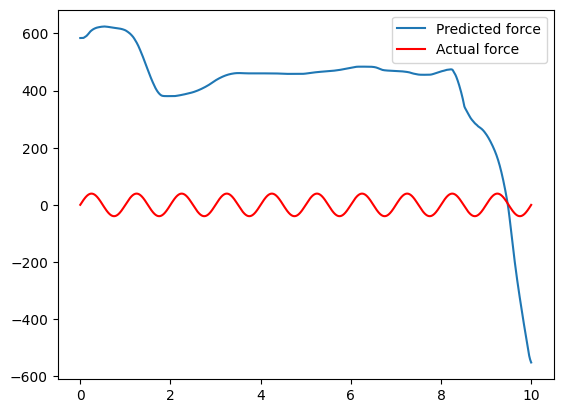

In [16]:
plt.plot(t_train,np.mean(f_pred,axis=(0, 2)),label='Predicted force')
plt.plot(t_train,f_train,'r',label='Actual force')
plt.legend()

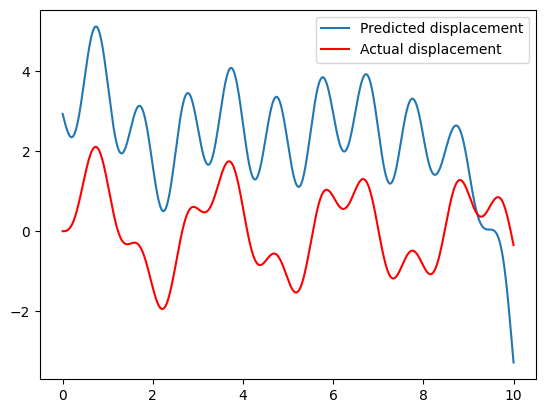

In [17]:
plt.plot(t_train,np.mean(x_pred,axis=(0, 2)),label='Predicted displacement')
plt.plot(t_train,x_train,'r',label='Actual displacement')
plt.legend()

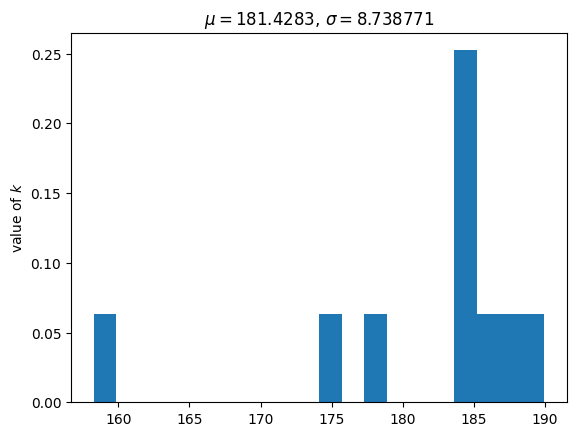

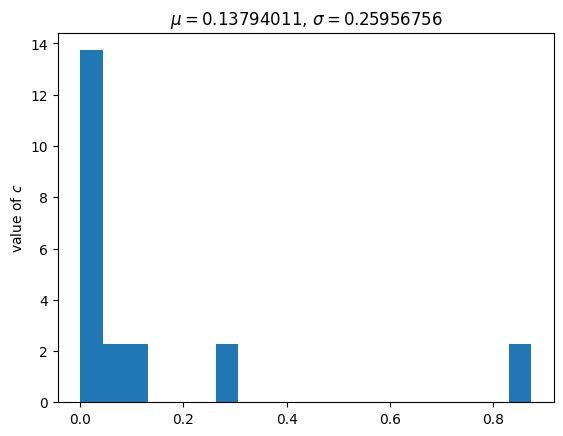

In [26]:
neuq.utils.hist(np.exp(logk_pred).flatten(), name="value of $k$")
neuq.utils.hist(np.exp(logc_pred).flatten(), name="value of $c$")

In [28]:
[a.shape for a in samples]

[(10, 1, 100),
 (10, 100, 100),
 (10, 100, 1),
 (10, 1, 100),
 (10, 1, 100),
 (10, 1, 1),
 (10, 1, 100),
 (10, 100, 100),
 (10, 100, 1),
 (10, 1, 100),
 (10, 1, 100),
 (10, 1, 1),
 (10,),
 (10,)]

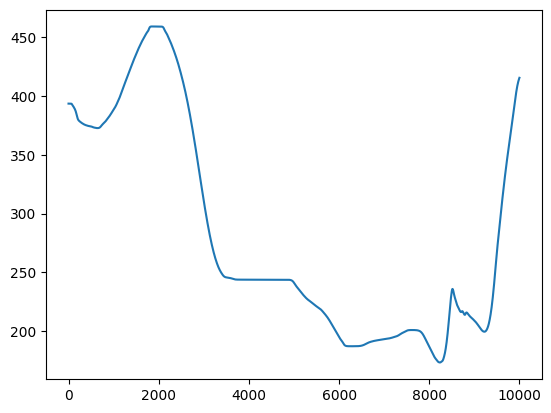

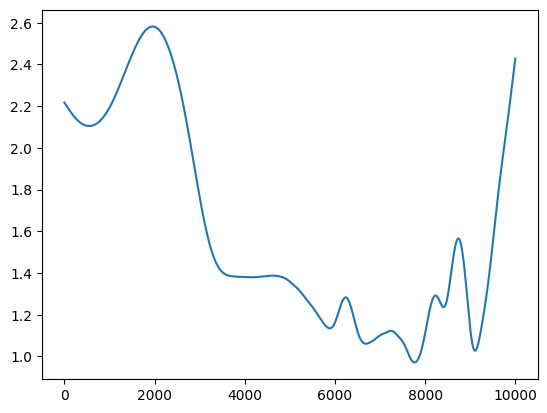

In [34]:
unc_f=np.std(f_pred,axis=0)
plt.plot(unc_f)
plt.figure()
unc_x=np.std(x_pred,axis=0)
plt.plot(unc_x)

In [30]:
Csamp=samples[12]    
Ksamp=samples[13]
C_post=np.exp(np.mean(Csamp))
print("C_true=0.22(Ns/m) and C_post =", C_post) 
K_post=np.exp(np.mean(Ksamp))
print("K_true=10(N/m) and K_post =", K_post) 

C_true=0.22(Ns/m) and C_post = 0.021472445
K_true=10(N/m) and K_post = 181.20497


In [ ]:
# plt.figure
# plt.plot(aa[:,0,0],'r')

In [ ]:
# sio.savemat("G:/My Drive/Python_codes/sdof0.mat", {"x_pred":x_pred, "k":samples[7].flatten(),"c":samples[6].flatten()})

In [32]:
data_to_save = {
   "x_pred":x_pred, "f_pred":f_pred, "c":samples[12].flatten(),"k":samples[13].flatten()
}
file_name = 'output_ukF.mat'
sio.savemat(file_name, data_to_save)